# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from scipy import stats


## Load the Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/py/1-Weekly Task/Datasets/Traffic_Accidents.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [ ]:
df.shape

(52000, 26)

In [ ]:
df.duplicated().sum()

43

In [ ]:
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,322
Number_of_Vehicles,0
Number_of_Casualties,1041
Date,0
Day_of_Week,0


In [ ]:
columns_to_drop = ['Local_Authority_(District)', 'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number', 'Road_Type','2nd_Road_Class', '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions', 'Did_Police_Officer_Attend_Scene_of_Accident']
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,322
Number_of_Vehicles,0
Number_of_Casualties,1041
Date,0
Day_of_Week,0


In [ ]:
df["Number_of_Casualties"].value_counts()

,count
Number_of_Casualties,
1.0,39035
2.0,8199
3.0,2367
4.0,844
5.0,288
6.0,130
7.0,44
8.0,23
9.0,8


In [ ]:
df["Accident_Severity"].mode()


,Accident_Severity
0,3.0


In [ ]:
df["Accident_Severity"].fillna(df["Accident_Severity"].mode()[0], inplace=True)
df["Number_of_Casualties"].fillna(df["Number_of_Casualties"].mode()[0], inplace=True)
df.dropna(subset="Urban_or_Rural_Area", inplace=True)



In [ ]:
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Date,0
Day_of_Week,0


In [ ]:
colums_na=[
    "Year", "Urban_or_Rural_Area", "Road_Surface_Conditions", "Weather_Conditions", "Speed_limit",
    "Day_of_Week", "Date", "Number_of_Casualties",
    "Number_of_Vehicles", "Accident_Severity", "Police_Force",
    "Latitude", "Longitude", "Location_Northing_OSGR", "Location_Easting_OSGR"]

In [ ]:
j=0
for i in range(15):
  print("\n",df[colums_na[j]].value_counts())
  j=1+j


 Year
2005    6653
2006    6474
2012    6279
2007    6277
2009    5702
2010    5371
2011    5243
2014    5155
2013    4758
Name: count, dtype: int64

 Urban_or_Rural_Area
1.0    33256
2.0    18655
3.0        1
Name: count, dtype: int64

 Road_Surface_Conditions
Dry                          35661
Wet/Damp                     14597
Frost/Ice                     1108
Snow                           383
Normal                          88
Flood (Over 3cm of water)       75
Name: count, dtype: int64

 Weather_Conditions
Fine without high winds       41591
Raining without high winds     6112
Other                          1185
Unknown                         965
Raining with high winds         716
Fine with high winds            583
Snowing without high winds      410
Fog or mist                     283
Snowing with high winds          67
Name: count, dtype: int64

 Speed_limit
30    33234
60     8366
40     4179
70     3839
50     1723
20      570
15        1
Name: count, dtype: int64

 Day_

In [ ]:
df.duplicated().sum()

46

In [ ]:
df.drop_duplicates()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Speed_limit,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,70,Raining with high winds,Flood (Over 3cm of water),2.0,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,30,Fine without high winds,Dry,1.0,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,30,Fine without high winds,Dry,1.0,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,30,Raining without high winds,Wet/Damp,1.0,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,30,Fine without high winds,Dry,1.0,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,475125.0,319380.0,-0.888006,52.766777,33,3.0,2,1.0,31/08/2012,6,30,Fine without high winds,Dry,1.0,2012
51996,456682.0,127058.0,-1.192915,51.040030,44,3.0,1,1.0,08/05/2013,4,60,Fine without high winds,Dry,2.0,2013
51997,540510.0,152250.0,0.012032,51.252055,45,3.0,3,1.0,01/11/2011,3,40,Raining without high winds,Wet/Damp,1.0,2011
51998,434720.0,334000.0,-1.485264,52.902301,30,3.0,2,2.0,22/07/2011,6,30,Raining without high winds,Wet/Damp,1.0,2011


In [ ]:
df.dublcated().rowssum()

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [ ]:
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df = df[(z_scores < 3).all(axis=1)]

#Scaler

In [ ]:
scaler = StandardScaler()
df_sc = scaler.fit_transform(df.select_dtypes(include=[np.number]))

#PCA

In [ ]:
pca = PCA(n_components=0.9)
df_pca = pca.fit_transform(df_sc)

df_pca = pd.DataFrame(df_pca)

print(f"Original number of features: {df_sc.shape[1]}")
print(f"Reduced number of features: {df_pca.shape[1]}")

Original number of features: 12
Reduced number of features: 8


## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [ ]:
selected_features = df[['Number_of_Vehicles',
                        'Number_of_Casualties', 'Longitude', 'Latitude', 'Road_Surface_Conditions',
                        'Weather_Conditions', 'Speed_limit', 'Urban_or_Rural_Area']]


#One-Hout Encoding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49224 entries, 0 to 51999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Location_Easting_OSGR    49224 non-null  float64
 1   Location_Northing_OSGR   49224 non-null  float64
 2   Longitude                49224 non-null  float64
 3   Latitude                 49224 non-null  float64
 4   Police_Force             49224 non-null  int64  
 5   Accident_Severity        49224 non-null  float64
 6   Number_of_Vehicles       49224 non-null  int64  
 7   Number_of_Casualties     49224 non-null  float64
 8   Date                     49224 non-null  object 
 9   Day_of_Week              49224 non-null  int64  
 10  Speed_limit              49224 non-null  int64  
 11  Weather_Conditions       49224 non-null  object 
 12  Road_Surface_Conditions  49224 non-null  object 
 13  Urban_or_Rural_Area      49224 non-null  float64
 14  Year                     49

In [ ]:
from sklearn.preprocessing import OneHotEncoder
categorical_cols = ['Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area']


onehot_encoder = OneHotEncoder(sparse=False, drop='first')
encoded_categorical_data = onehot_encoder.fit_transform(selected_features[categorical_cols])


encoded_df = pd.DataFrame(encoded_categorical_data, columns=onehot_encoder.get_feature_names_out(categorical_cols))

selected_features_numeric = selected_features.drop(categorical_cols, axis=1)
selected_features_encoded = pd.concat([selected_features_numeric, encoded_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

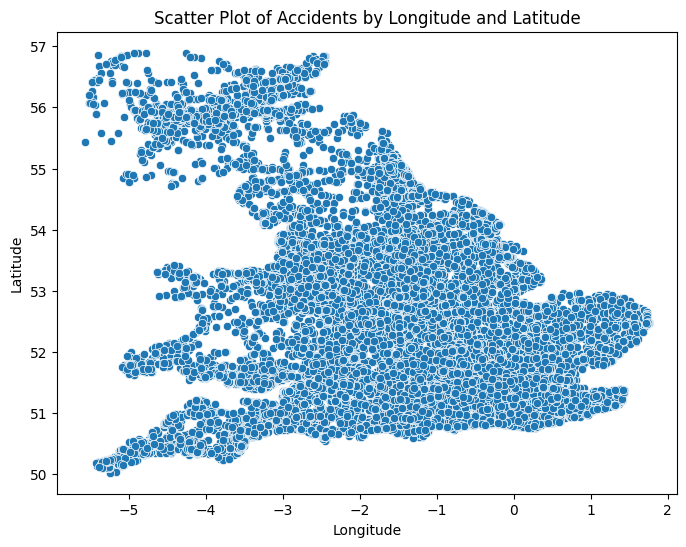

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Longitude', y='Latitude', data=df,)
plt.title('Scatter Plot of Accidents by Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [ ]:
wcss =[]

for i in range(1,11):
  kmeans = KMeans(n_clusters=i,random_state=42)
  kmeans.fit(df_pca)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

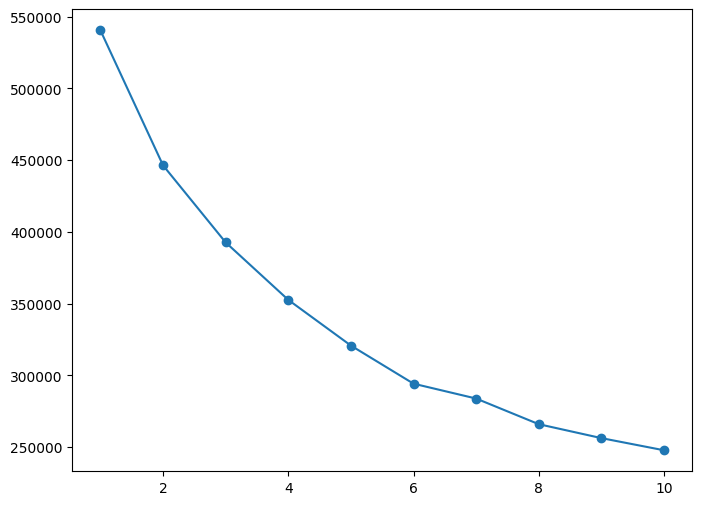

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss,marker='o')

# Train the K-Means model


In [ ]:
km = KMeans(n_clusters = 2)
km.fit(df_pca)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score(df_pca, km.labels_)


0.16255333906354183

In [ ]:
print(df_pca.shape)
print(km.cluster_centers_.shape)


(49224, 8)
(2, 8)


## Plot the data points with their predicted cluster center

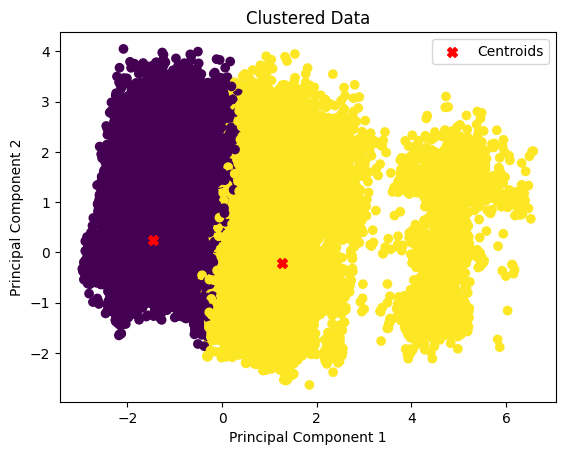

In [ ]:
plt.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], c=km.labels_, cmap='viridis')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=50, c='red', marker='X', label='Centroids')
plt.title('Clustered Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?